<a href="https://colab.research.google.com/github/Cchrisekwugum/Ds_Python_Projects/blob/main/Onyekachi_Christopher_chrisekwugum_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

### Objectives of Analysis
1. Conduct exploratory analysis on at least 3 features and one target varaible.
2. Visualize the relationship between the features and the target variable using;
* Scatter plots
* Histogram
* Box plots
  * Understanding the distribution  of the dataset or the feature in particular
3. Identify outliers
4. Handle the outliers and explain the process.


In [ ]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
 # load dataset and view dataset
bank = pd.read_csv('/content/drive/MyDrive/AltSchool_Capstone/Assesment/bank-full.csv', sep = ';')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 1. Understanding my dataset

In [ ]:
# view the dataframe columns
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

##### Understanding what each name column means or represents
* Customer's Demography
1. age (numeric)
2. job (categorical)
3. marital (categorical)
4. education (categorical)

* Customer's Behaviour and financial status
5. default (categorical)
6. balance (numeric)
7. housing (categorical)
8. loan (categorical)
9. contact (categorical)

* Customers Relationship and Marketing
10. day (numeric)
11. month (categorical)
12. duration (numeric)
13. campaign (numeric)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign(categorical)
17. y: has the client subscribed a term deposit? (binary:"yes","no")

#### Data Cleaning Process

In [ ]:
# check for missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### The output of the above code shows that there are not missing values in our dataset.

In [ ]:
# Check for outliers in the numerical columns

## first step: carry out descriptive statistics
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### From the descriptive statisticsw, we could have clues on potential outliers by;
1. comparing the how far apart is the mean from the median
2. comparing the mean and the standard deviation.

* For the age column,with an aproximated mean of 41 and median of 39,hence, the possibilty of having outliers is quite low. And also, looking at the maximun age which is 95, there are high possiblity of having 95 years old customers.
* For the "balance" column, this column has a very high mean of 1362 and median balalnce of 448. The maximun balance which is 102127 is quite high.
* For day, duration, campaign, pdays and previous will all be cross chechked using box plots.

In [ ]:
# create a list for  the numeric columns
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

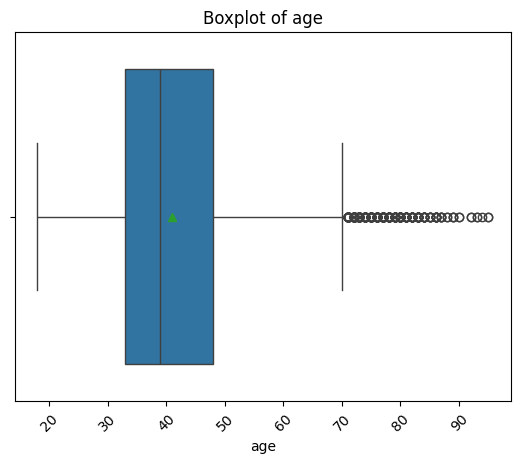

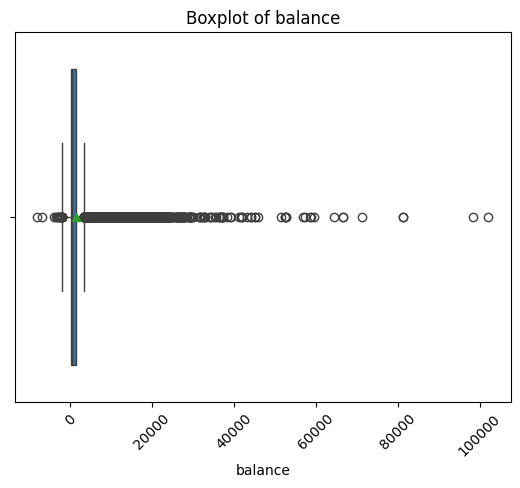

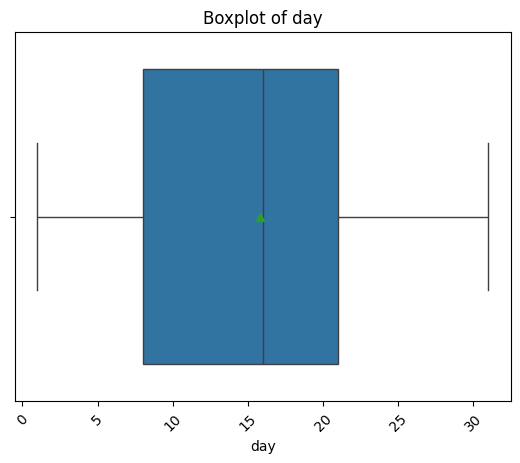

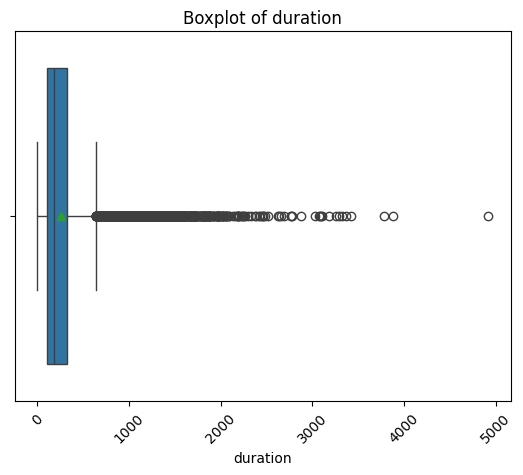

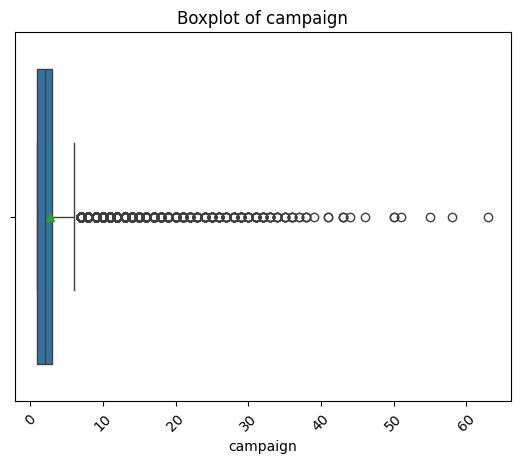

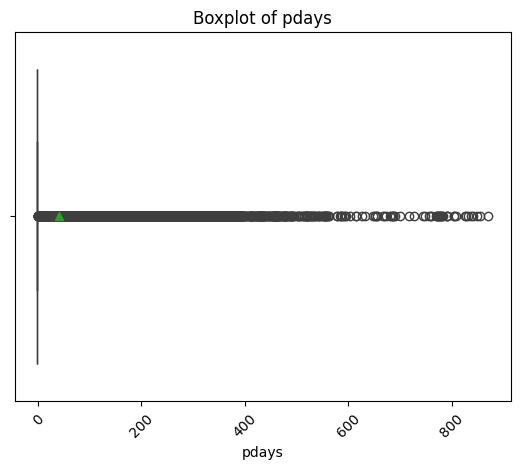

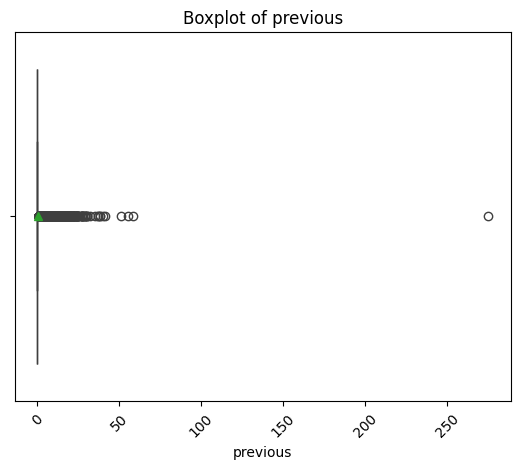

In [ ]:
# Create  boxplots for all numerical variables using for loop
for col in numeric_cols:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(data=bank, x=col, showmeans=True)
    plt.title(f"Boxplot of {col}")  # plot labels using f-function
    plt.xticks(rotation=45)
    plt.show()

Boxplot is an efficient way to display all the characteristics of the data distribution, such as the overall shape, skewness, and symmetry.

Insights:
* From the "age" boxplot, it clearly showedthat it is skewed to the right.
* The boxplot showed that the max age is  70.(from the extreme right wiskers of the box, Q3 + 1.5 * IQR) Putting the rest age as outliers.
* But looking at the kind of data we are looking at, which is a bank data, it is very possible to have customers whose ages are above 70 years of age.
* Hence, I wouldnt tag age to have outliers even though it is statistically proven to have.
(the code  explain the above insights)

In [ ]:
# Subset the
bank[bank['age'] >= 70].count()

age          554
job          554
marital      554
education    554
default      554
balance      554
housing      554
loan         554
contact      554
day          554
month        554
duration     554
campaign     554
pdays        554
previous     554
poutcome     554
y            554
dtype: int64

In [ ]:
# lets group by age and job, then take a count to see what can be discoverd
groupby_age = bank.groupby(['age','job']).count().reset_index()
groupby_age.tail(24) # picking out the last 24

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
572,79,housemaid,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
573,79,retired,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
574,80,housemaid,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
575,80,management,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
576,80,retired,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
577,81,management,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
578,81,retired,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
579,82,housemaid,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
580,82,retired,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
581,82,unknown,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### Insight from the above codes show that there some customers whose age are above 70 that are housemaids(9) of them, with this and checking their education background with the code below, looking at their education, balances, loans and if ther bought term depossit or not. I could conclude that the ages above 70 are no outliers..
Hence,  I wont be removing outliers from this exploration, but  I could write out the codes for removing outliers and comment them out, should a reason to use them arises.

In [ ]:
# filter out ages above 70 and jobs that are housemaids
bank[(bank["age"] >= 70) & (bank["job"] == "housemaid")].value_counts()

age  job        marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
70   housemaid  divorced  primary    no       1311     no       no    cellular   11   aug    651       1         -1     0         unknown   yes    1
80   housemaid  married   primary    no       0        no       no    cellular   23   feb    639       1          189   1         failure   yes    1
83   housemaid  divorced  primary    no       5944     no       no    cellular   30   jul    200       3         -1     0         unknown   no     1
82   housemaid  married   primary    no       2140     no       no    telephone  14   apr    118       6         -1     0         unknown   no     1
                divorced  primary    no       1381     no       no    cellular   28   jul    844       5          181   4         failure   yes    1
                                                                                      jan    86        3       

In [ ]:
# fixing the outliers using the Inter Quartile Range
# step1: lets calculate the IQR
# the code below could be repeated for each of the numerical columns

# create a list  for the numerical columns

num_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# create the required function to remove all outliers
# def remove_outliers(df, col):
#   Q1 = data[col].quantile(0.25)
#   Q3 = data[col].quantile(0.75)
#   iqr = Q3 - Q1
#   upper_bound = Q3 + (1.5 * iqr)
#   lower_bound = Q1 - (1.5 * iqr)
#   return data[data[col].between(lower_bound, upper_bound)]

####################################################
# # Apply the function
# cleaned_bank_df = bank.copy()
# for col in num_columns:
#   cleaned_bank_df = remove_outliers(cleaned_bank_df, col)

In [ ]:
# Finally lets check if there are duplicated values in this dataset
bank.duplicated().sum()

0

##### From the output, it showed that there are no duplicate values.

# Exploratory Data Analysis


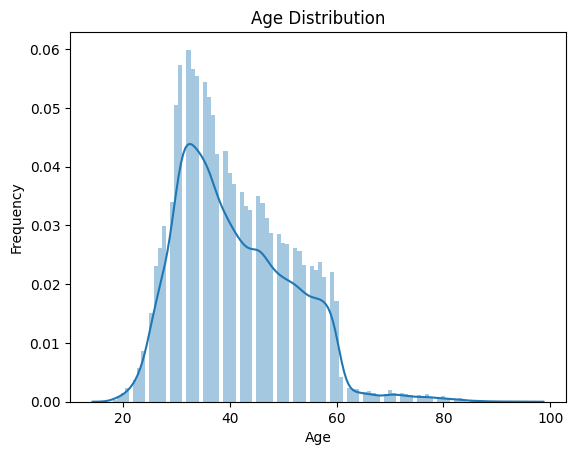

In [ ]:
#Create the histogram for age column
sns.distplot(bank.age, bins=100)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


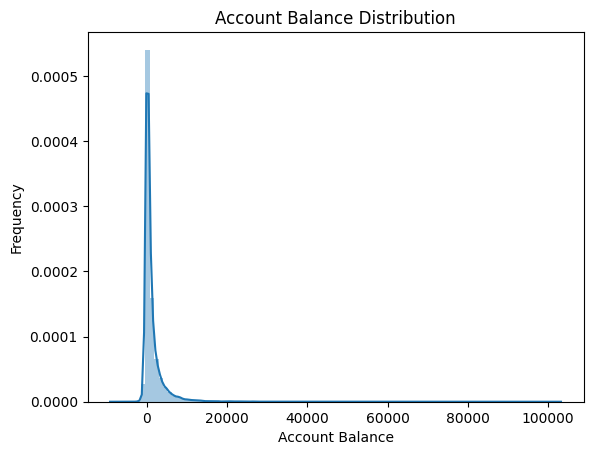

In [ ]:
#Create the histogram for balance column
sns.distplot(bank.balance, bins=100)
plt.title("Account Balance Distribution")
plt.xlabel("Account Balance")
plt.ylabel("Frequency")
plt.show()

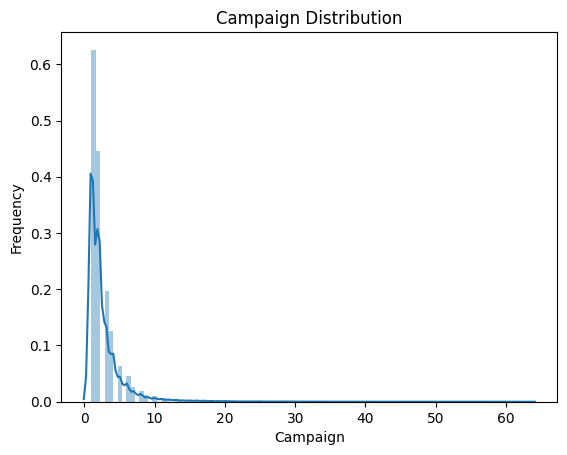

In [ ]:
#Create the histogram for age column
sns.distplot(bank.campaign, bins=100)
plt.title("Campaign Distribution")
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.show()

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

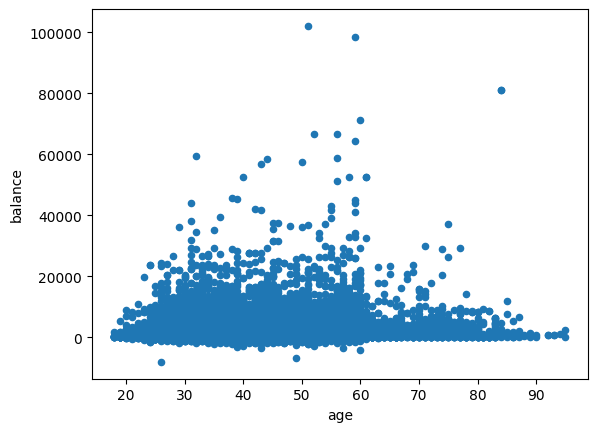

In [ ]:
# Scatterplot showing age and balance
bank.plot(kind='scatter', x='age', y='balance');

# Across all ages, majority of people have savings of less than 20000.

From the scattered plot above, we dan see that there are more custmers with a balance below 2000. This will help to understand customer segmentation and the tpyes of products to present to these customers.

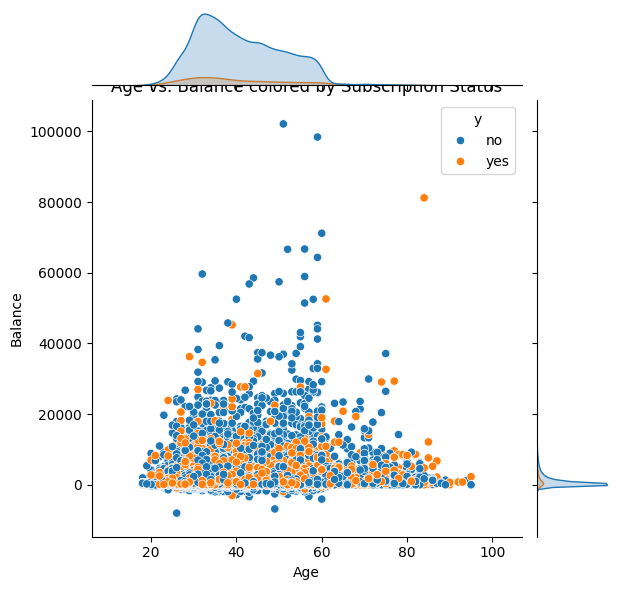

In [ ]:
# LEts see if age and account balance have influence on the purchae of term deposit
sns.jointplot(x='age', y='balance', hue='y', data=bank)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs. Balance colored by Subscription Status')
plt.show()

Customer accross all age range purchase time deposit, but it is interesting to know that customers with balance of above 200000 rarely purchased accordoing to this data, this gives a quite open revelation about the customers behaviour, and how to channel marketing campaign.

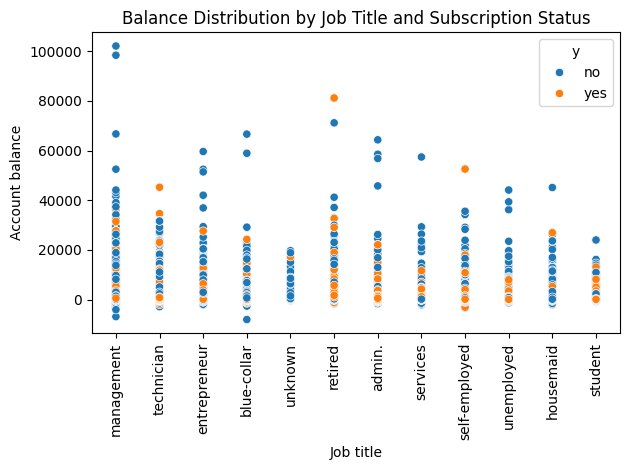

In [ ]:
# lets see how job and account balance influences purchase of term deposit
sns.scatterplot(x='job',y='balance', hue='y', data=bank)
plt.xlabel('Job title')
plt.ylabel('Account balance')
plt.title('Balance Distribution by Job Title and Subscription Status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insight from the plot above, we could see that job type to a large extent have influence on purchase, just a few people doing housemaid and unknown jobs actually purchased term deposit.

In [ ]:
# # I will be creating histograms to see the distribution of the numerical columns
# #  I would like to create a function that will get it done easily

# def plot_histograms(data):
#   num_columns = data.select_dtypes(include=np.number)
#   fig, axes = plt.subplots(nrows=int(np.ceil(len(num_columns) / 3)), ncols=3, figsize=(12, 8))
#   for i, col in enumerate(num_columns):
#     ax = axes.flat[i]
#     sns.histplot(data[col], ax=ax, kernel_density=False)  # Optional optimization
#     ax.set_title(col)
#   if len(num_columns) < len(axes.flat):
#     for ax in axes.flat[len(num_columns):]:
#       ax.axis('off')
#   fig.tight_layout()
#   plt.show()

In [ ]:
# letsw see  if our function is working
#plot_histograms(bank)